# Data sat 1 

## [Forest Fires](https://archive.ics.uci.edu/dataset/162/forest+fires)

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: [http://www.dsi.uminho.pt/~pcortez/forestfires](http://www.dsi.uminho.pt/~pcortez/forestfires)).

# o que podemos saber

Primeiro é importante salientar que este material foi utilizado no artigo de referência e parece muito intressatne eu utilizar tanto para um algoritmo capz de prever sabendo de 500 valores qual seria o próximo.  Para isso vamos entender o dataset

## Sobre o dataset 


Este dataset possui um artigo anexado que explica os headers assim como dá uma introdução ao tema 

conforme a tabela a seguir: 


| Variable Name | Role    | Type        | Description                                                                                                                                                     | Units           | Missing Values |
|---------------|---------|-------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------|----------------|
| X             | Feature | Integer     | x-axis spatial coordinate within the Montesinho park map: 1 to 9                                                                                                |                 | no             |
| Y             | Feature | Integer     | y-axis spatial coordinate within the Montesinho park map: 2 to 9                                                                                                |                 | no             |
| month         | Feature | Categorical | month of the year: 'jan' to 'dec'                                                                                                                               |                 | no             |
| day           | Feature | Categorical | day of the week: 'mon' to 'sun'                                                                                                                                 |                 | no             |
| FFMC          | Feature | Continuous  | FFMC index from the FWI system: 18.7 to 96.20                                                                                                                   |                 | no             |
| DMC           | Feature | Integer     | DMC index from the FWI system: 1.1 to 291.3                                                                                                                     |                 | no             |
| DC            | Feature | Continuous  | DC index from the FWI system: 7.9 to 860.6                                                                                                                      |                 | no             |
| ISI           | Feature | Continuous  | ISI index from the FWI system: 0.0 to 56.10                                                                                                                     |                 | no             |
| temp          | Feature | Continuous  | temperature: 2.2 to 33.30                                                                                                                                       | Celsius degrees | no             |
| RH            | Feature | Integer     | relative humidity: 15.0 to 100                                                                                                                                  | %               | no             |
| wind          | Feature | Continuous  | wind speed: 0.40 to 9.40                                                                                                                                        | km/h            | no             |
| rain          | Feature | Integer     | outside rain: 0.0 to 6.4                                                                                                                                        | mm/m2           | no             |
| area          | Target  | Integer     | the burned area of the forest: 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform). | ha              | no             |


Essas variáveis partem do FWI que representa o índice meteroilógico de incêndio e ele se baseia em 6 tyermos 

<ol>
<li>Create an Env</li>
<div>
conda create --name mlp-env
</div>
</ol>

In [4]:
import pandas as pd

df = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/NEURO/neuro_inpe/trab/trab_MLP/dataset /forestfires.csv')

print(df.to_string()) 

     X  Y month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain     area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2   51   6.7   0.0     0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0   33   0.9   0.0     0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6   33   1.3   0.0     0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3   97   4.0   0.2     0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4   99   1.8   0.0     0.00
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00
6    8  6   aug  mon  92.3   88.9  495.6   8.5  24.1   27   3.1   0.0     0.00
7    8  6   aug  mon  91.5  145.4  608.2  10.7   8.0   86   2.2   0.0     0.00
8    8  6   sep  tue  91.0  129.5  692.6   7.0  13.1   63   5.4   0.0     0.00
9    7  5   sep  sat  92.5   88.0  698.6   7.1  22.8   40   4.0   0.0     0.00
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8   51   7.2   0.0     0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3

In [10]:
import numpy as np 

r = np.genfromtxt(df, delimiter=',', dtype=None, names=True, skip_header=True)
print(r[2])
print(r[2].shape)

('FFMC',)
()


In [16]:
import pandas as pd


# If you already have a DataFrame, skip the above and start from here


csv_data = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/NEURO/neuro_inpe/trab/trab_MLP/dataset /forestfires.csv')

df = csv_data.to_string()



In [24]:
header = csv_data.columns.tolist()
print(header)
matrix = csv_data.values.tolist()
print(matrix)

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
[[7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0], [7, 4, 'oct', 'tue', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0], [7, 4, 'oct', 'sat', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0, 0.0], [8, 6, 'mar', 'fri', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0], [8, 6, 'mar', 'sun', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0, 0.0], [8, 6, 'aug', 'sun', 92.3, 85.3, 488.0, 14.7, 22.2, 29, 5.4, 0.0, 0.0], [8, 6, 'aug', 'mon', 92.3, 88.9, 495.6, 8.5, 24.1, 27, 3.1, 0.0, 0.0], [8, 6, 'aug', 'mon', 91.5, 145.4, 608.2, 10.7, 8.0, 86, 2.2, 0.0, 0.0], [8, 6, 'sep', 'tue', 91.0, 129.5, 692.6, 7.0, 13.1, 63, 5.4, 0.0, 0.0], [7, 5, 'sep', 'sat', 92.5, 88.0, 698.6, 7.1, 22.8, 40, 4.0, 0.0, 0.0], [7, 5, 'sep', 'sat', 92.5, 88.0, 698.6, 7.1, 17.8, 51, 7.2, 0.0, 0.0], [7, 5, 'sep', 'sat', 92.8, 73.2, 713.0, 22.6, 19.3, 38, 4.0, 0.0, 0.0], [6, 5, 'aug', 'fri', 63.5, 70.8, 665.3, 0.8, 17.0, 72,

In [102]:
# Assuming 'matrix' is already defined as in the previous examples

# Extract each column and save them into separate lists
X = [row[0] for row in matrix]
Y = [row[1] for row in matrix]
month = [row[2] for row in matrix]
day = [row[3] for row in matrix]
FFMC = [row[4] for row in matrix]
DMC = [row[5] for row in matrix]
DC = [row[6] for row in matrix]
ISI = [row[7] for row in matrix]
temp = [row[8] for row in matrix]
RH = [row[9] for row in matrix]
wind = [row[10] for row in matrix]
rain = [row[11] for row in matrix]
area = [row[12] for row in matrix]

# Display the results
print("X:", X)
print("Y:", Y)
print("month:", month)
print("day:", day)
print("FFMC:", FFMC)
print("DMC:", DMC)
print("DC:", DC)
print("ISI:", ISI)
print("temp:", temp)
print("RH:", RH)
print("wind:", wind)
print("rain:", rain)
print("area:", area)


X: [7, 7, 7, 8, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 5, 8, 6, 6, 6, 5, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 4, 4, 4, 4, 4, 4, 5, 5, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 8, 8, 8, 8, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 4, 3, 3, 3, 3, 9, 1, 2, 1, 8, 1, 2, 6, 5, 8, 2, 8, 6, 9, 3, 5, 1, 7, 2, 2, 2, 7, 7, 6, 6, 8, 8, 6, 6, 6, 6, 8, 5, 8, 7, 4, 1, 1, 6, 2, 2, 8, 1, 8, 5, 7, 8, 2, 8, 1, 6, 7, 6, 2, 2, 4, 2, 2, 6, 4, 3, 2, 1, 6, 7, 8, 5, 4, 2, 7, 6, 8, 4, 7, 7, 7, 4, 4, 4, 1, 4, 6, 8, 3, 4, 2, 7, 4, 7, 8, 4, 8, 4, 1, 6, 9, 4, 8, 2, 1, 6, 7, 6, 4, 2, 7, 2, 3, 5, 2, 8, 3, 8, 8, 6, 7, 6, 2, 8, 4, 3, 7, 2, 3, 2, 6, 4, 4, 6, 2, 3, 4, 2, 8, 2, 4, 8, 4, 4, 3, 4, 4, 4, 6, 6, 3, 5, 2, 7, 7, 7, 7, 2, 9, 4, 7, 8, 7, 6, 8, 8, 6, 6, 6, 3, 3, 6, 1, 7, 3, 2, 2, 7, 6, 2, 6, 4, 3, 4, 4, 6, 5, 6, 1, 6, 3, 6, 1, 5, 6, 6, 4, 3, 7, 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the lists are already defined (X, Y, month, day, FFMC, etc.)

# Create a DataFrame with your data
data = {
    'X': X,
    'Y': Y,
    'mes' : month,
    'dia' : day,
    'FFMC': FFMC,
    'DMC': DMC,
    'DC': DC,
    'ISI': ISI,
    'temp': temp,
    'RH': RH,
    'wind': wind,
    'rain': rain,
    'area': area
}

df = pd.DataFrame(data)

# Display the DataFrame to check
print(df)


     X  Y  mes  dia  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..  ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [76]:
# Mapping of month names to numbers
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}


In [77]:
df['mes'] = df['mes'].map(month_mapping)

print(df['mes'])

0       3
1      10
2      10
3       3
4       3
       ..
512     8
513     8
514     8
515     8
516    11
Name: mes, Length: 517, dtype: int64


In [78]:
# Mapping of day names to numbers
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 
    'fri': 5, 'sat': 6, 'sun': 7
}


In [79]:
df['dia'] = df['dia'].map(day_mapping)

print(df['dia'])

0      5
1      2
2      6
3      5
4      7
      ..
512    7
513    7
514    7
515    6
516    2
Name: dia, Length: 517, dtype: int64


In [80]:
month = [df['mes']]
day = [df['dia']]

In [83]:
print(month)

[0       3
1      10
2      10
3       3
4       3
       ..
512     8
513     8
514     8
515     8
516    11
Name: mes, Length: 517, dtype: int64]


In [84]:
data_dia = {
    'x' : X,
    'y' : Y,
    'dia' : day,
    'mes' :  month,
    'FFMC': FFMC,
    'DMC': DMC,
    'DC': DC,
    'ISI': ISI,
    'temp': temp,
    'RH': RH,
    'wind': wind,
    'rain': rain,
    'area': area
}





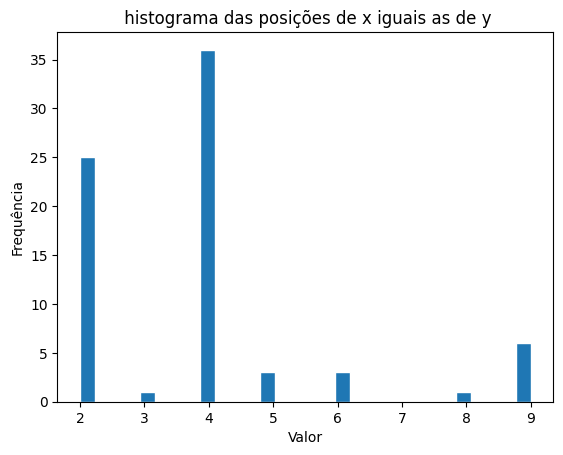

In [71]:
'''
for i in range(len(list_same_days)):
    print(f"{data_dia['x'][list_same_days[i]]} e {data_dia['y'][list_same_days[i]]}" )
'''

import pandas as pd
import matplotlib.pyplot as plt
# Cria o histograma
plt.hist(list_same_x_y, bins=30, edgecolor='white')  # bins é o número de barras no histograma

# Adiciona título e rótulos aos eixos
plt.title(' histograma das posições de x iguais as de y')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Exibe o histograma
plt.show()


In [72]:
print(len(list_same_x_y))

75


# Conclusão: 

Deste gráfico fica claro que quando está na posição em que (x,y) = (4,4) temos uma maior quantidade de valores de 

In [64]:
print(list_same_x_y)

[5, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 4, 4, 9, 2, 9, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 2, 5, 9, 2, 8, 2, 5, 2, 9, 4, 4, 4, 4, 6, 6, 4]


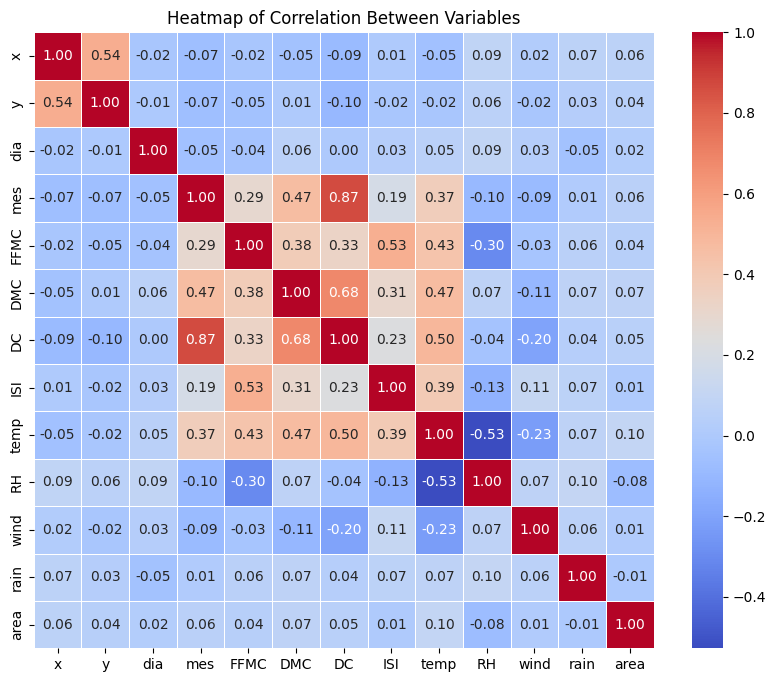

In [85]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.title("Heatmap of Correlation Between Variables")
plt.show()


## Análise dos dados: 

O fwi do sistema canadence de avalição de fogo e inclui 6 componentes:

-FFMC(Fine)

In [30]:
!pip install scikit-learn


  Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 805.5 kB/s eta 0:00:00m eta 0:00:010:00:02


# regressão 

irei tentar estimar o valor de area tendo todas as variáveis como entrada visto que as demais entradas não são correlatas. Em adição, informo que os meses estão variando de 1 a 12 em vez de janeiro a dezembro e que alem disso os dias da semana estão variando de 1 até 7 em vez de segunda a domingo.

In [88]:
# Verificar o tamanho de cada variável
print(f"Tamanho da variável 'X': {len(X)}")
print(f"Tamanho da variável 'Y': {len(Y)}")
print(f"Tamanho da variável 'day': {len(day)}")
print(f"Tamanho da variável 'month': {len(month)}")
print(f"Tamanho da variável 'FFMC': {len(FFMC)}")
print(f"Tamanho da variável 'DMC': {len(DMC)}")
print(f"Tamanho da variável 'DC': {len(DC)}")
print(f"Tamanho da variável 'ISI': {len(ISI)}")
print(f"Tamanho da variável 'temp': {len(temp)}")
print(f"Tamanho da variável 'RH': {len(RH)}")
print(f"Tamanho da variável 'wind': {len(wind)}")
print(f"Tamanho da variável 'rain': {len(rain)}")



Tamanho da variável 'X': 517
Tamanho da variável 'Y': 517
Tamanho da variável 'day': 1
Tamanho da variável 'month': 1
Tamanho da variável 'FFMC': 517
Tamanho da variável 'DMC': 517
Tamanho da variável 'DC': 517
Tamanho da variável 'ISI': 517
Tamanho da variável 'temp': 517
Tamanho da variável 'RH': 517
Tamanho da variável 'wind': 517
Tamanho da variável 'rain': 517
Tamanho da variável 'area': 517


In [95]:
len(np.transpose(day))


517

In [103]:
df2 = pd.DataFrame({
    'x': X,
    'y': Y,
    'FFMC': FFMC,
    'DMC': DMC,
    'DC': DC,
    'ISI': ISI,
    'temp': temp,
    'RH': RH,
    'wind': wind,
    'rain': rain,
    'area': area
})


In [104]:
X = df[['x', 'y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = df['area']


In [112]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo MLP
model = MLPRegressor(hidden_layer_sizes=(3, 50), max_iter=10000, random_state=111)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Imprimir a performance do modelo
print(f"R² Score: {model.score(X_test, y_test)}")


Mean Squared Error: 11660.91321162564
R² Score: 0.010761067943638958
